## Problem statement

Here I have to pull the large amount of data from flipkart website and I want to do it as quickly as possible using **Web Scraping** concept.
After getting the data from the Particular website my problem statement is to get all the information from customer prospective mind like
1. which brand has more demand?
2. which product is more efficient?
3. Which is more Reliable?
4. Which product has more ratings and reviews?
5. Which product is availiable under their budget prices?
6. Which product has more features?

### what we have to do is....

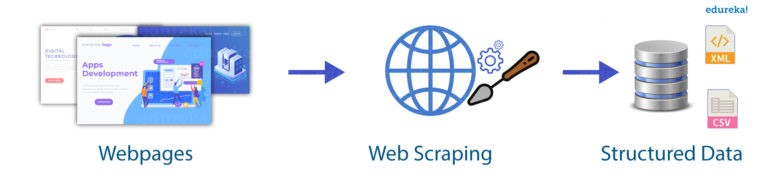

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for web scraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
URL ='https://www.flipkart.com/search?q=refrigerator&sid=j9e%2Cabm%2Chzg&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_2_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=refrigerator%7CRefrigerators&requestId=ff702131-7413-4ae4-bcb4-dcfba0517c53&'

#### URL page view

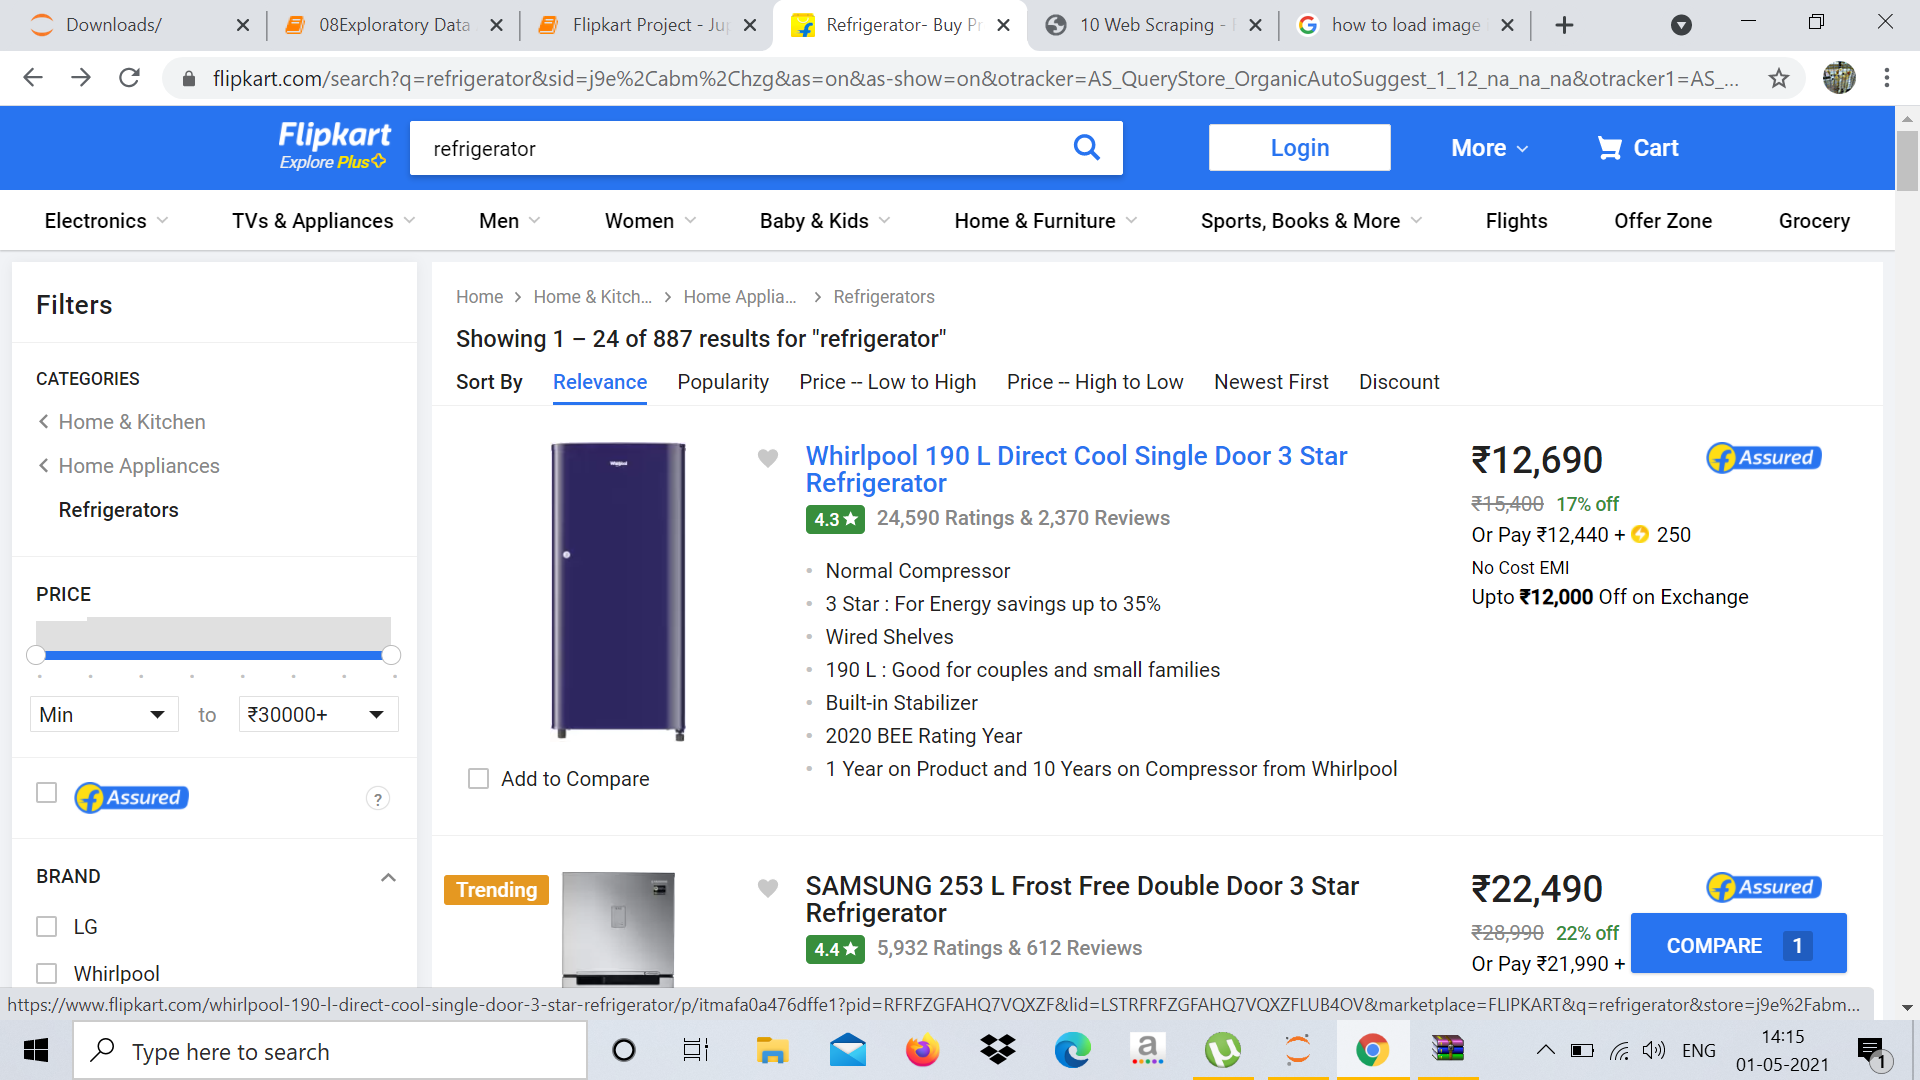

In [3]:
page = requests.get(URL)

In [4]:
# check the status code

page.status_code


200

In [5]:
# get the HTML code from the URL

pagecontent = page.text
print(pagecontent)


<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-t

In [6]:
soup = BeautifulSoup(pagecontent)
print(soup)


<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/appl

## Inspect the page

In [7]:
product_details = soup.findAll('div', attrs={'class':'_3pLy-c row'})


In [8]:
for product in product_details:
      # title
    i = product.find('div', attrs = {'class':'_4rR01T'})
    print(i.text)
    
    # rating
    j = product.find('div', attrs = {'class':'_3LWZlK'})
    if j is None:
        print(np.NaN)
    else:
        print(j.text)
    
    # num of ratings & reviews
    k = product.find('span', attrs = {'class':'_2_R_DZ'})
    if k is None:
        print(np.NaN)
    else:
        print(k.text)
    
    # price
    l = product.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
    if l is None:
        print(np.NaN)
    else:
        print(l.text)

    # Features
    f = []
    m = product.find('ul', attrs = {'class':'_1xgFaf'})
    for li in m:
        f.append(li.text)
    print(f)
    
    print('-'*100)
    

Whirlpool 190 L Direct Cool Single Door 3 Star Refrigerator
4.3
24,594 Ratings & 2,371 Reviews
₹12,690
['Normal Compressor', '3 Star : For Energy savings up to 35%', 'Wired Shelves', '190 L : Good for couples and small families', 'Built-in Stabilizer', '2020 BEE Rating Year', '1 Year on Product and 10 Years on Compressor from Whirlpool']
----------------------------------------------------------------------------------------------------
SAMSUNG 253 L Frost Free Double Door 3 Star Refrigerator
4.4
5,932 Ratings & 612 Reviews
₹22,490
['Digital Inverter Compressor', '3 Star : For Energy savings up to 35%', 'Toughened Glass Shelves', '253 L : Good for families of 3-5 members', 'Built-in Stabilizer', '2020 BEE Rating Year', '1 Year on Product and 10 Years on Compressor From Samsung']
----------------------------------------------------------------------------------------------------
SAMSUNG 192 L Direct Cool Single Door 2 Star Refrigerator
4.3
13,171 Ratings & 1,340 Reviews
₹12,290
['Linear

In [9]:
title = []
rating = []
RnR = []
price = []
features = []
pgno = []
for x in range(1,31):
    start_time = time.time()
    url="https://www.flipkart.com/search?q=refrigerator&sid=j9e%2Cabm%2Chzg&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_2_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=refrigerator%7CRefrigerators&requestId=ff702131-7413-4ae4-bcb4-dcfba0517c53&as-backfill=on&page={}".format(x)
    
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    product_details = soup.findAll('div', attrs={'class':'_3pLy-c row'})
    
    for product in product_details:    
        # title
        i = product.find('div', attrs = {'class':'_4rR01T'})
        if i is None:
            title.append(np.NaN)
        else:
            title.append(i.text)

        # rating
        j = product.find('div', attrs = {'class':'_3LWZlK'})
        if j is None:
            rating.append(np.NaN)
        else:
            rating.append(j.text)

        # num of ratings & reviews
        k = product.find('span', attrs = {'class':'_2_R_DZ'})
        if k is None:
            RnR.append(np.NaN)
        else:
            RnR.append(k.text)

        # price
        l = product.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        if l is None:
            price.append(np.NaN)
        else:
            price.append(l.text)

        # Features
        f = []
        m = product.find('ul', attrs = {'class':'_1xgFaf'})
        for li in m:
            f.append(li.text)
        features.append(f)
        
        pgno.append(x)
    
    end_time = time.time()
    print('Page {} completed in {} seconds.'.format(x, end_time-start_time))
    


Page 1 completed in 0.702904462814331 seconds.
Page 2 completed in 0.822880744934082 seconds.
Page 3 completed in 0.8369576930999756 seconds.
Page 4 completed in 0.7840690612792969 seconds.
Page 5 completed in 0.8306088447570801 seconds.
Page 6 completed in 0.9794635772705078 seconds.
Page 7 completed in 0.7187802791595459 seconds.
Page 8 completed in 0.7340075969696045 seconds.
Page 9 completed in 0.7501339912414551 seconds.
Page 10 completed in 0.7190399169921875 seconds.
Page 11 completed in 0.7081396579742432 seconds.
Page 12 completed in 0.9133765697479248 seconds.
Page 13 completed in 0.7368557453155518 seconds.
Page 14 completed in 0.8927571773529053 seconds.
Page 15 completed in 0.7134382724761963 seconds.
Page 16 completed in 0.7134480476379395 seconds.
Page 17 completed in 0.7141597270965576 seconds.
Page 18 completed in 0.7264773845672607 seconds.
Page 19 completed in 0.696643590927124 seconds.
Page 20 completed in 0.6287105083465576 seconds.
Page 21 completed in 0.816286087

In [10]:
df = pd.DataFrame({'Product_Name':title,'Price':price,'Rating':rating,'RnR':RnR, 'Features':features, 'Page':pgno})


In [11]:
df

Product_Name    Price Rating  \
0    Whirlpool 190 L Direct Cool Single Door 3 Star...  ₹12,690    4.3   
1    SAMSUNG 253 L Frost Free Double Door 3 Star Re...  ₹22,490    4.4   
2    SAMSUNG 192 L Direct Cool Single Door 2 Star R...  ₹12,290    4.3   
3    SAMSUNG 198 L Direct Cool Single Door 4 Star R...  ₹16,340    4.5   
4    LG 260 L Frost Free Double Door Top Mount 3 St...  ₹25,290    4.4   
..                                                 ...      ...    ...   
715  LG 360 L Frost Free Double Door 3 Star Convert...  ₹43,290    3.7   
716  Hitachi 318 L Frost Free Double Door 3 Star Co...  ₹30,899    NaN   
717  Whirlpool 185 L Direct Cool Single Door 3 Star...  ₹14,330    4.2   
718  SAMSUNG 253 L Frost Free Double Door 2 Star Co...  ₹27,500    4.8   
719  Panasonic 296 L Frost Free Double Door 2 Star ...  ₹28,999    4.3   

                                RnR  \
0    24,594 Ratings & 2,371 Reviews   
1       5,932 Ratings & 612 Reviews   
2    13,171 Ratings & 1,340 Reviews   
3    15,224 Ratings & 1,974 Reviews   
4    12,413 Ratings & 1,591 Reviews   
..                              ...   
715           3 Ratings & 0 Reviews   
716                             NaN   
717          43 Ratings & 8 Reviews   
718           6 Ratings & 0 Reviews   
719         66 Ratings & 14 Reviews   

                                              Features  Page  
0    [Normal Compressor, 3 Star : For Energy saving...     1  
1    [Digital Inverter Compressor, 3 Star : For Ene...     1  
2    [Linear Compressor, 2 Star : For Energy saving...     1  
3    [Digital Inverter Compressor, 4 Star : For Ene...     1  
4    [Smart Inverter Compressor, 3 Star : For Energ...     1  
..                                                 ...   ...  
715  [Inverter Linear Compressor, 3 Star : For Ener...    30  
716  [Digital Inverter Compressor, 3 Star : For Ene...    30  
717  [Rotary Compressor, 3 Star : For Energy saving...    30  
718  [Digital Inverter Compressor, 2 Star : For Ene...    30  
719  [Inverter Compressor, 2 Star : For Energy savi...    30  

[720 rows x 6 columns]

In [12]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_Name  720 non-null    object
 1   Price         720 non-null    object
 2   Rating        592 non-null    object
 3   RnR           592 non-null    object
 4   Features      720 non-null    object
 5   Page          720 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 33.9+ KB


### Extract the below information from the dataframe:


1. Model name
2. Door type
3. Direct/Frost cool
4. Compressor type
5. Energy Star
6. Litres
7. Rating Year
8. Stabilizer check
9. Warranty

In [13]:
df.Features.apply(lambda x:x[0]).value_counts()
df.Features.apply(lambda x:x[1]).value_counts()
df.Features.apply(lambda x:x[2]).value_counts()
df.Features.apply(lambda x:x[3]).value_counts()

Digital Inverter Compressor                                          150
Inverter Compressor                                                   92
Normal Compressor                                                     77
Smart Inverter Compressor                                             69
Reciprocatory Compressor                                              61
Inverter Linear Compressor                                            33
Digital Inverter                                                      30
DC Inverter Compressor                                                30
Reciprocating Compressor                                              20
IntelliSense Inverter Compressor                                      18
Inverter                                                              15
Linear Compressor                                                     14
Intellisense Inverter Compressor                                      14
Rotary Compressor                                  

3 Star : For Energy savings up to 35%    279
2 Star : For Energy savings up to 20%    222
4 Star : For Energy savings up to 45%    107
Toughened Glass Shelves                   57
5 Star : For Energy savings up to 55%     32
1 Star                                     9
Inverter Technology Star                   8
Wired Shelves                              5
30 L : Good for bachelors                  1
Name: Features, dtype: int64

Toughened Glass Shelves                        628
Wired Shelves                                   29
240 L : Good for families of 3-5 members         6
260 L : Good for families of 3-5 members         5
525 L : Good for large families                  4
687 L : Good for large families                  4
570 L : Good for large families                  4
700 L : Good for large families                  3
485 L : Good for large families                  3
690 L : Good for large families                  3
594 L : Good for large families                  3
330 L : Good for families of 3-5 members         2
300 L : Good for families of 3-5 members         2
604 L : Good for large families                  2
563 L : Good for large families                  2
544 L : Good for large families                  2
584 L : Good for large families                  2
505 L : Good for large families                  1
565 L : Good for large families                  1
2019 BEE Rating Year           

190 L : Good for couples and small families    99
192 L : Good for couples and small families    68
Built-in Stabilizer                            43
215 L : Good for couples and small families    41
200 L : Good for couples and small families    36
                                               ..
346 L : Good for families of 3-5 members        1
594 L : Good for large families                 1
212 L : Good for couples and small families     1
181 L : Good for couples and small families     1
314 l : Good for families of 3-5 members        1
Name: Features, Length: 111, dtype: int64

In [14]:
df.Features = df.Features.apply(lambda x:','.join(x)) # converting list into stirng

In [15]:
df.head()

Product_Name    Price Rating  \
0  Whirlpool 190 L Direct Cool Single Door 3 Star...  ₹12,690    4.3   
1  SAMSUNG 253 L Frost Free Double Door 3 Star Re...  ₹22,490    4.4   
2  SAMSUNG 192 L Direct Cool Single Door 2 Star R...  ₹12,290    4.3   
3  SAMSUNG 198 L Direct Cool Single Door 4 Star R...  ₹16,340    4.5   
4  LG 260 L Frost Free Double Door Top Mount 3 St...  ₹25,290    4.4   

                              RnR  \
0  24,594 Ratings & 2,371 Reviews   
1     5,932 Ratings & 612 Reviews   
2  13,171 Ratings & 1,340 Reviews   
3  15,224 Ratings & 1,974 Reviews   
4  12,413 Ratings & 1,591 Reviews   

                                            Features  Page  
0  Normal Compressor,3 Star : For Energy savings ...     1  
1  Digital Inverter Compressor,3 Star : For Energ...     1  
2  Linear Compressor,2 Star : For Energy savings ...     1  
3  Digital Inverter Compressor,4 Star : For Energ...     1  
4  Smart Inverter Compressor,3 Star : For Energy ...     1

In [16]:
print(df.Features[0])
print(df.Features[10])
print(df.Features[100])
len(df.Features[0])

Normal Compressor,3 Star : For Energy savings up to 35%,Wired Shelves,190 L : Good for couples and small families,Built-in Stabilizer,2020 BEE Rating Year,1 Year on Product and 10 Years on Compressor from Whirlpool
Inverter Compressor,3 Star : For Energy savings up to 35%,Toughened Glass Shelves,258 L : Good for families of 3-5 members,Built-in Stabilizer,2020 BEE Rating Year,1 Year Warranty on Product and 10 Years on Compressor
Digital Inverter Compressor,2 Star : For Energy savings up to 20%,Toughened Glass Shelves,272 L : Good for families of 3-5 members,Built-in Stabilizer,2020 BEE Rating Year,1 Year on Product and 10 Years on Compressor From Samsung


214

In [17]:
##### Compressor type
Compressor_regex = re.compile(r'^\w*')
Compressor_regex.findall(df.Features[0])

df['Compressor_type'] = df.Features.apply(lambda x:Compressor_regex.findall(x))

['Normal']

In [18]:
# Energystar
Energystar_regex = re.compile(r'[0-9\s]+Star')

Energystar_regex.findall(df.Features[0])
df['Energystar'] = df.Features.apply(lambda x:Energystar_regex.findall(x))


['3 Star']

In [19]:
# Energysavings
Energysavings_regex = re.compile(r'[0-9$]+%')

Energysavings_regex.findall(df.Features[0])
df['Energysavings'] = df.Features.apply(lambda x:Energysavings_regex.findall(x))


['35%']

In [20]:
#Litres
Litres_regex = re.compile(r'[0-9\s$]+L|[0-9\s$]+l')

Litres_regex.findall(df.Features[0])

df['Litres_capacity'] = df.Features.apply(lambda x:Litres_regex.findall(x))


['190 L']

In [21]:
#BEE Rating
BEE_Rating_regex = re.compile(r'[A-Za-z0-9\s\w$]+Rating Year')

BEE_Rating_regex.findall(df.Features[0])

df['BEE_Rating_capacity'] = df.Features.apply(lambda x:BEE_Rating_regex.findall(x))


['2020 BEE Rating Year']

In [22]:
#Stabilizer check
Stabilizer_regex = re.compile(r'\w+\W\w+\sStabilizer')

Stabilizer_regex.findall(df.Features[0])

df['Stabilizer_capacity'] = df.Features.apply(lambda x:Stabilizer_regex.findall(x))


['Built-in Stabilizer']

In [23]:
# Compressor Warranty
Warranty_regex = re.compile(r'and\s(\d+)\sYears')

Warranty_regex.findall(df.Features[0])

df['Compressor_Warranty'] = df.Features.apply(lambda x:Warranty_regex.findall(x))


['10']

In [24]:
#Warranty on product
Warranty_regex = re.compile(r'Rating\s\w+\W(\d+)')

Warranty_regex.findall(df.Features[0])

df['Product_Warranty'] = df.Features.apply(lambda x:Warranty_regex.findall(x))


['1']

In [25]:
# Brand

Brand_regex = re.compile(r'^\w+')

df['Brand'] = df['Product_Name'].apply(lambda x:Brand_regex.findall(x))

In [26]:
# Door type

Door_regex = re.compile(r'\w+\WDoor|Side\sby\sSide')

df['Door'] = df['Product_Name'].apply(lambda x:Door_regex.findall(x))

In [27]:
#  Direct/Frost cool

coolingtype_regex = re.compile(r'[\w$]+ Cool|Frost\sFree')

df['coolingtype'] = df['Product_Name'].apply(lambda x:coolingtype_regex.findall(x))

In [28]:
df.head(1)

Product_Name    Price Rating  \
0  Whirlpool 190 L Direct Cool Single Door 3 Star...  ₹12,690    4.3   

                              RnR  \
0  24,594 Ratings & 2,371 Reviews   

                                            Features  Page Compressor_type  \
0  Normal Compressor,3 Star : For Energy savings ...     1        [Normal]   

  Energystar Energysavings Litres_capacity     BEE_Rating_capacity  \
0   [3 Star]         [35%]         [190 L]  [2020 BEE Rating Year]   

     Stabilizer_capacity Compressor_Warranty Product_Warranty        Brand  \
0  [Built-in Stabilizer]                [10]              [1]  [Whirlpool]   

            Door    coolingtype  
0  [Single Door]  [Direct Cool]

### Coverting all the list to string

In [29]:
df.Compressor_type = df.Compressor_type.apply(lambda x:''.join(x))
df.Energystar = df.Energystar.apply(lambda x:''.join(x))
df.Energysavings = df.Energysavings.apply(lambda x:''.join(x))
df.Litres_capacity = df.Litres_capacity.apply(lambda x:''.join(x))
df.BEE_Rating_capacity = df.BEE_Rating_capacity.apply(lambda x:''.join(x))
df.Stabilizer_capacity = df.Stabilizer_capacity.apply(lambda x:''.join(x))
df.Compressor_Warranty = df.Compressor_Warranty.apply(lambda x:''.join(x))
df.Product_Warranty = df.Product_Warranty.apply(lambda x:''.join(x))
df.Brand = df.Brand.apply(lambda x:''.join(x))
df.Door = df.Door.apply(lambda x:''.join(x))
df.coolingtype = df.coolingtype.apply(lambda x:''.join(x))

### Checking the data wheather it is converted/not

In [30]:
df.head()

Product_Name    Price Rating  \
0  Whirlpool 190 L Direct Cool Single Door 3 Star...  ₹12,690    4.3   
1  SAMSUNG 253 L Frost Free Double Door 3 Star Re...  ₹22,490    4.4   
2  SAMSUNG 192 L Direct Cool Single Door 2 Star R...  ₹12,290    4.3   
3  SAMSUNG 198 L Direct Cool Single Door 4 Star R...  ₹16,340    4.5   
4  LG 260 L Frost Free Double Door Top Mount 3 St...  ₹25,290    4.4   

                              RnR  \
0  24,594 Ratings & 2,371 Reviews   
1     5,932 Ratings & 612 Reviews   
2  13,171 Ratings & 1,340 Reviews   
3  15,224 Ratings & 1,974 Reviews   
4  12,413 Ratings & 1,591 Reviews   

                                            Features  Page Compressor_type  \
0  Normal Compressor,3 Star : For Energy savings ...     1          Normal   
1  Digital Inverter Compressor,3 Star : For Energ...     1         Digital   
2  Linear Compressor,2 Star : For Energy savings ...     1          Linear   
3  Digital Inverter Compressor,4 Star : For Energ...     1         Digital   
4  Smart Inverter Compressor,3 Star : For Energy ...     1           Smart   

  Energystar Energysavings Litres_capacity   BEE_Rating_capacity  \
0     3 Star           35%           190 L  2020 BEE Rating Year   
1     3 Star           35%           253 L  2020 BEE Rating Year   
2     2 Star           20%           192 L  2021 BEE Rating Year   
3     4 Star           45%           198 L  2020 BEE Rating Year   
4     3 Star           35%         260 L L  2021 BEE Rating Year   

   Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
0  Built-in Stabilizer                  10                1  Whirlpool   
1  Built-in Stabilizer                  10                1    SAMSUNG   
2                                       10                1    SAMSUNG   
3  Built-in Stabilizer                  10                1    SAMSUNG   
4  Built-in Stabilizer                  10                1         LG   

          Door  coolingtype  
0  Single Door  Direct Cool  
1  Double Door   Frost Free  
2  Single Door  Direct Cool  
3  Single Door  Direct Cool  
4  Double Door   Frost Free

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_Name         720 non-null    object
 1   Price                720 non-null    object
 2   Rating               592 non-null    object
 3   RnR                  592 non-null    object
 4   Features             720 non-null    object
 5   Page                 720 non-null    int64 
 6   Compressor_type      720 non-null    object
 7   Energystar           720 non-null    object
 8   Energysavings        720 non-null    object
 9   Litres_capacity      720 non-null    object
 10  BEE_Rating_capacity  720 non-null    object
 11  Stabilizer_capacity  720 non-null    object
 12  Compressor_Warranty  720 non-null    object
 13  Product_Warranty     720 non-null    object
 14  Brand                720 non-null    object
 15  Door                 720 non-null    object
 16  coolingt

### Covert the empty strings to null values

In [32]:
list1=[]
for i in df.Stabilizer_capacity:
    if i=='':
        list1.append(np.NaN)
        
    else:
        list1.append(i)
df.Stabilizer_capacity=list1   


        
list2=[]
for i in df.Compressor_type:
    if i=='':
        list2.append(np.NaN)
        
    else:
        list2.append(i)   
df.Compressor_type=list2    



list3=[]
for i in df.Energystar:
    if i=='':
        list3.append(np.NaN)
        
    else:
        list3.append(i)        
df.Energystar=list3


        
list4=[]
for i in df.Litres_capacity :
    if i=='':
        list4.append(np.NaN)
        
    else:
        list4.append(i)  
df.Litres_capacity=list4
      
        
list5=[]
for i in df.BEE_Rating_capacity :
    if i=='':
        list5.append(np.NaN)
        
    else:
        list5.append(i)    
df.BEE_Rating_capacity=list5

        

        
                
list7=[]
for i in df.Brand:
    if i=='':
        list7.append(np.NaN)
        
    else:
        list7.append(i)   
df.Brand=list7        
        
    
        
        
list8=[]
for i in df.Door:
    if i=='':
        list8.append(np.NaN)
        
    else:
        list8.append(i)  
df.Door=list8


        
list9=[]
for i in df.coolingtype:
    if i=='':
        list9.append(np.NaN)
        
    else:
        list9.append(i)  
df.coolingtype=list9        
        
        
list10=[]
for i in df.Energysavings:
    if i=='':
        list10.append(np.NaN)
        
    else:
        list10.append(i)
df.Energysavings=list10        
        
        
list11=[]
for i in df.Compressor_Warranty:
    if i=='':
        list11.append(np.NaN)
        
    else:
        list11.append(i) 
df.Compressor_Warranty=list11        
        
        
list12=[]
for i in df.Product_Warranty:
    if i=='':
        list12.append(np.NaN)
        
    else:
        list12.append(i)  
df.Product_Warranty=list12        
        

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_Name         720 non-null    object
 1   Price                720 non-null    object
 2   Rating               592 non-null    object
 3   RnR                  592 non-null    object
 4   Features             720 non-null    object
 5   Page                 720 non-null    int64 
 6   Compressor_type      720 non-null    object
 7   Energystar           658 non-null    object
 8   Energysavings        640 non-null    object
 9   Litres_capacity      720 non-null    object
 10  BEE_Rating_capacity  720 non-null    object
 11  Stabilizer_capacity  662 non-null    object
 12  Compressor_Warranty  697 non-null    object
 13  Product_Warranty     720 non-null    object
 14  Brand                720 non-null    object
 15  Door                 719 non-null    object
 16  coolingt

# Data Cleaning

In [34]:
 # check for missing values
df.isnull().sum()


Product_Name             0
Price                    0
Rating                 128
RnR                    128
Features                 0
Page                     0
Compressor_type          0
Energystar              62
Energysavings           80
Litres_capacity          0
BEE_Rating_capacity      0
Stabilizer_capacity     58
Compressor_Warranty     23
Product_Warranty         0
Brand                    0
Door                     1
coolingtype              0
dtype: int64

### Handling Missing values

In [35]:
df[df.Rating.isnull()]

Product_Name    Price Rating  RnR  \
155  Haier 195 L Direct Cool Single Door 5 Star Con...  ₹15,190    NaN  NaN   
163  Whirlpool 215 L Direct Cool Single Door 5 Star...  ₹18,990    NaN  NaN   
168  LG 190 L Direct Cool Single Door 3 Star Refrig...  ₹14,790    NaN  NaN   
191  SAMSUNG 192 L Direct Cool Single Door 2 Star R...  ₹14,790    NaN  NaN   
195  LG 260 L Frost Free Double Door 2 Star Refrige...  ₹23,999    NaN  NaN   
..                                                 ...      ...    ...  ...   
697  SAMSUNG 230 L Direct Cool Single Door 3 Star R...  ₹18,999    NaN  NaN   
699  Godrej 195 L Direct Cool Single Door 3 Star Re...  ₹14,990    NaN  NaN   
707  Croma 310 L Frost Free Double Door 2 Star Refr...  ₹23,990    NaN  NaN   
708  Hitachi 451 L Frost Free Double Door 2 Star Re...  ₹53,259    NaN  NaN   
716  Hitachi 318 L Frost Free Double Door 3 Star Co...  ₹30,899    NaN  NaN   

                                              Features  Page Compressor_type  \
155  Inverter Compressor,5 Star : For Energy saving...     7        Inverter   
163  IntelliSense Inverter Compressor,5 Star : For ...     7    IntelliSense   
168  Smart Inverter Compressor,3 Star : For Energy ...     8           Smart   
191  Linear Compressor,2 Star : For Energy savings ...     8          Linear   
195  Smart Inverter Compressor,2 Star : For Energy ...     9           Smart   
..                                                 ...   ...             ...   
697  Digital Inverter Compressor,3 Star : For Energ...    30         Digital   
699  Reciprocatory Compressor,3 Star : For Energy s...    30   Reciprocatory   
707  Normal Compressor,2 Star : For Energy savings ...    30          Normal   
708  Inverter Compressor,2 Star : For Energy saving...    30        Inverter   
716  Digital Inverter Compressor,3 Star : For Energ...    30         Digital   

    Energystar Energysavings Litres_capacity   BEE_Rating_capacity  \
155     5 Star           55%           195 L  2021 BEE Rating Year   
163     5 Star           55%           215 L  2020 BEE Rating Year   
168     3 Star           35%         190 L L  2021 BEE Rating Year   
191     2 Star           20%           192 L  2021 BEE Rating Year   
195     2 Star           20%         260 L L  2020 BEE Rating Year   
..         ...           ...             ...                   ...   
697     3 Star           35%           230 L  2021 BEE Rating Year   
699     3 Star           35%           195 L  2021 BEE Rating Year   
707     2 Star           20%           310 L  2020 BEE Rating Year   
708     2 Star           20%         451 L l  2015 BEE Rating Year   
716     3 Star           35%           318 L  2018 BEE Rating Year   

     Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
155  Built-in Stabilizer                  10                1      Haier   
163  Built-in Stabilizer                  10                1  Whirlpool   
168  Built-in Stabilizer                  10                1         LG   
191  Built-in Stabilizer                  10                1    SAMSUNG   
195  Built-in Stabilizer                  10                1         LG   
..                   ...                 ...              ...        ...   
697  Built-in Stabilizer                  10                1    SAMSUNG   
699  Built-in Stabilizer                  10                1     Godrej   
707                  NaN                  10                1      Croma   
708  Built-in Stabilizer                  10                1    Hitachi   
716  Built-in Stabilizer                  10                1    Hitachi   

            Door  coolingtype  
155  Single Door  Direct Cool  
163  Single Door  Direct Cool  
168  Single Door  Direct Cool  
191  Single Door  Direct Cool  
195  Double Door   Frost Free  
..           ...          ...  
697  Single Door  Direct Cool  
699  Single Door  Direct Cool  
707  Double Door   Frost Free  
708  Double Door   Frost Free  
716  Double Door   Frost F

In [36]:
df[df.RnR.isnull()]

Product_Name    Price Rating  RnR  \
155  Haier 195 L Direct Cool Single Door 5 Star Con...  ₹15,190    NaN  NaN   
163  Whirlpool 215 L Direct Cool Single Door 5 Star...  ₹18,990    NaN  NaN   
168  LG 190 L Direct Cool Single Door 3 Star Refrig...  ₹14,790    NaN  NaN   
191  SAMSUNG 192 L Direct Cool Single Door 2 Star R...  ₹14,790    NaN  NaN   
195  LG 260 L Frost Free Double Door 2 Star Refrige...  ₹23,999    NaN  NaN   
..                                                 ...      ...    ...  ...   
697  SAMSUNG 230 L Direct Cool Single Door 3 Star R...  ₹18,999    NaN  NaN   
699  Godrej 195 L Direct Cool Single Door 3 Star Re...  ₹14,990    NaN  NaN   
707  Croma 310 L Frost Free Double Door 2 Star Refr...  ₹23,990    NaN  NaN   
708  Hitachi 451 L Frost Free Double Door 2 Star Re...  ₹53,259    NaN  NaN   
716  Hitachi 318 L Frost Free Double Door 3 Star Co...  ₹30,899    NaN  NaN   

                                              Features  Page Compressor_type  \
155  Inverter Compressor,5 Star : For Energy saving...     7        Inverter   
163  IntelliSense Inverter Compressor,5 Star : For ...     7    IntelliSense   
168  Smart Inverter Compressor,3 Star : For Energy ...     8           Smart   
191  Linear Compressor,2 Star : For Energy savings ...     8          Linear   
195  Smart Inverter Compressor,2 Star : For Energy ...     9           Smart   
..                                                 ...   ...             ...   
697  Digital Inverter Compressor,3 Star : For Energ...    30         Digital   
699  Reciprocatory Compressor,3 Star : For Energy s...    30   Reciprocatory   
707  Normal Compressor,2 Star : For Energy savings ...    30          Normal   
708  Inverter Compressor,2 Star : For Energy saving...    30        Inverter   
716  Digital Inverter Compressor,3 Star : For Energ...    30         Digital   

    Energystar Energysavings Litres_capacity   BEE_Rating_capacity  \
155     5 Star           55%           195 L  2021 BEE Rating Year   
163     5 Star           55%           215 L  2020 BEE Rating Year   
168     3 Star           35%         190 L L  2021 BEE Rating Year   
191     2 Star           20%           192 L  2021 BEE Rating Year   
195     2 Star           20%         260 L L  2020 BEE Rating Year   
..         ...           ...             ...                   ...   
697     3 Star           35%           230 L  2021 BEE Rating Year   
699     3 Star           35%           195 L  2021 BEE Rating Year   
707     2 Star           20%           310 L  2020 BEE Rating Year   
708     2 Star           20%         451 L l  2015 BEE Rating Year   
716     3 Star           35%           318 L  2018 BEE Rating Year   

     Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
155  Built-in Stabilizer                  10                1      Haier   
163  Built-in Stabilizer                  10                1  Whirlpool   
168  Built-in Stabilizer                  10                1         LG   
191  Built-in Stabilizer                  10                1    SAMSUNG   
195  Built-in Stabilizer                  10                1         LG   
..                   ...                 ...              ...        ...   
697  Built-in Stabilizer                  10                1    SAMSUNG   
699  Built-in Stabilizer                  10                1     Godrej   
707                  NaN                  10                1      Croma   
708  Built-in Stabilizer                  10                1    Hitachi   
716  Built-in Stabilizer                  10                1    Hitachi   

            Door  coolingtype  
155  Single Door  Direct Cool  
163  Single Door  Direct Cool  
168  Single Door  Direct Cool  
191  Single Door  Direct Cool  
195  Double Door   Frost Free  
..           ...          ...  
697  Single Door  Direct Cool  
699  Single Door  Direct Cool  
707  Double Door   Frost Free  
708  Double Door   Frost Free  
716  Double Door   Frost F

In [37]:
df[df.Energystar.isnull()]

Product_Name    Price Rating  \
20   Whirlpool 240 L Frost Free Triple Door Refrige...  ₹25,990    4.4   
50   Whirlpool 300 L Frost Free Triple Door Refrige...  ₹31,990    4.4   
53   Whirlpool 240 L Frost Free Triple Door Refrige...  ₹26,490    4.4   
79   Whirlpool 260 L Frost Free Triple Door Refrige...  ₹27,990    4.4   
81   SAMSUNG 700 L Frost Free Side by Side Refriger...  ₹71,990    4.5   
..                                                 ...      ...    ...   
654         Godrej 30 L Qube Personal Cooling Solution   ₹6,790    4.2   
666  Whirlpool 330 L Frost Free Triple Door Refrige...  ₹38,890    4.4   
672     LG 687 L Direct Cool Side by Side Refrigerator  ₹80,990    NaN   
681  Lifelong 500 L Frost Free Multi-Door Refrigerator  ₹54,990    NaN   
701  Whirlpool 240 L Frost Free Triple Door Refrige...  ₹23,490    4.4   

                                RnR  \
20   18,826 Ratings & 2,535 Reviews   
50   18,827 Ratings & 2,533 Reviews   
53   18,827 Ratings & 2,533 Reviews   
79   18,826 Ratings & 2,535 Reviews   
81         610 Ratings & 65 Reviews   
..                              ...   
654     2,234 Ratings & 211 Reviews   
666  18,827 Ratings & 2,535 Reviews   
672                             NaN   
681                             NaN   
701     5,279 Ratings & 897 Reviews   

                                              Features  Page Compressor_type  \
20   Normal Compressor,Toughened Glass Shelves,240 ...     1          Normal   
50   Normal Compressor,Toughened Glass Shelves,300 ...     3          Normal   
53   Normal Compressor,Toughened Glass Shelves,240 ...     3          Normal   
79   Normal Compressor,Toughened Glass Shelves,260 ...     4          Normal   
81   Digital Inverter Compressor,Toughened Glass Sh...     4         Digital   
..                                                 ...   ...             ...   
654  Wired Shelves,30 L : Good for bachelors,2019 B...    28           Wired   
666  Normal Compressor,Toughened Glass Shelves,330 ...    28          Normal   
672  Inverter Linear Compressor,Toughened Glass She...    29        Inverter   
681  Inverter Compressor,Toughened Glass Shelves,50...    29        Inverter   
701  Reciprocatory Compressor,Toughened Glass Shelv...    30   Reciprocatory   

    Energystar Energysavings Litres_capacity             BEE_Rating_capacity  \
20         NaN           NaN           240 L              NA BEE Rating Year   
50         NaN           NaN           300 L              NA BEE Rating Year   
53         NaN           NaN           240 L            2020 BEE Rating Year   
79         NaN           NaN           260 L              NA BEE Rating Year   
81         NaN           NaN         700 L l              NA BEE Rating Year   
..         ...           ...             ...                             ...   
654        NaN           NaN            30 L            2019 BEE Rating Year   
666        NaN           NaN           330 L              NA BEE Rating Year   
672        NaN           NaN      L687 L l L            2020 BEE Rating Year   
681        NaN           NaN         500 L l  Not Applicable BEE Rating Year   
701        NaN           NaN           240 L              NA BEE Rating Year   

     Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
20   Built-in Stabilizer                  10                1  Whirlpool   
50   Built-in Stabilizer                  10                1  Whirlpool   
53   Built-in Stabilizer                  10                1  Whirlpool   
79   Built-in Stabilizer                  10                1  Whirlpool   
81   Built-in Stabilizer                  10                1    SAMSUNG   
..                   ...                 ...              ...        ...   
654                  NaN                 NaN                1     Godrej   
666  Built-in Stabilizer                  10                1  Whirlpool   
672                  NaN                  10                1         LG   
68

In [38]:
df[df.Energysavings.isnull()]

Product_Name    Price Rating  \
20   Whirlpool 240 L Frost Free Triple Door Refrige...  ₹25,990    4.4   
37   SAMSUNG 192 L Direct Cool Single Door 1 Star R...  ₹11,590    4.3   
50   Whirlpool 300 L Frost Free Triple Door Refrige...  ₹31,990    4.4   
53   Whirlpool 240 L Frost Free Triple Door Refrige...  ₹26,490    4.4   
79   Whirlpool 260 L Frost Free Triple Door Refrige...  ₹27,990    4.4   
..                                                 ...      ...    ...   
666  Whirlpool 330 L Frost Free Triple Door Refrige...  ₹38,890    4.4   
672     LG 687 L Direct Cool Side by Side Refrigerator  ₹80,990    NaN   
681  Lifelong 500 L Frost Free Multi-Door Refrigerator  ₹54,990    NaN   
701  Whirlpool 240 L Frost Free Triple Door Refrige...  ₹23,490    4.4   
702  Midea 95 L Direct Cool Single Door 1 Star Refr...   ₹9,290    4.4   

                                RnR  \
20   18,826 Ratings & 2,535 Reviews   
37      4,196 Ratings & 393 Reviews   
50   18,827 Ratings & 2,533 Reviews   
53   18,827 Ratings & 2,533 Reviews   
79   18,826 Ratings & 2,535 Reviews   
..                              ...   
666  18,827 Ratings & 2,535 Reviews   
672                             NaN   
681                             NaN   
701     5,279 Ratings & 897 Reviews   
702           7 Ratings & 2 Reviews   

                                              Features  Page Compressor_type  \
20   Normal Compressor,Toughened Glass Shelves,240 ...     1          Normal   
37   Normal Compressor,1 Star,Toughened Glass Shelv...     2          Normal   
50   Normal Compressor,Toughened Glass Shelves,300 ...     3          Normal   
53   Normal Compressor,Toughened Glass Shelves,240 ...     3          Normal   
79   Normal Compressor,Toughened Glass Shelves,260 ...     4          Normal   
..                                                 ...   ...             ...   
666  Normal Compressor,Toughened Glass Shelves,330 ...    28          Normal   
672  Inverter Linear Compressor,Toughened Glass She...    29        Inverter   
681  Inverter Compressor,Toughened Glass Shelves,50...    29        Inverter   
701  Reciprocatory Compressor,Toughened Glass Shelv...    30   Reciprocatory   
702  Reciprocating Compressor,1 Star,Toughened Glas...    30   Reciprocating   

    Energystar Energysavings Litres_capacity             BEE_Rating_capacity  \
20         NaN           NaN           240 L              NA BEE Rating Year   
37      1 Star           NaN           192 L            2020 BEE Rating Year   
50         NaN           NaN           300 L              NA BEE Rating Year   
53         NaN           NaN           240 L            2020 BEE Rating Year   
79         NaN           NaN           260 L              NA BEE Rating Year   
..         ...           ...             ...                             ...   
666        NaN           NaN           330 L              NA BEE Rating Year   
672        NaN           NaN      L687 L l L            2020 BEE Rating Year   
681        NaN           NaN         500 L l  Not Applicable BEE Rating Year   
701        NaN           NaN           240 L              NA BEE Rating Year   
702     1 Star           NaN            95 L            2020 BEE Rating Year   

     Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
20   Built-in Stabilizer                  10                1  Whirlpool   
37   Built-in Stabilizer                  10                1    SAMSUNG   
50   Built-in Stabilizer                  10                1  Whirlpool   
53   Built-in Stabilizer                  10                1  Whirlpool   
79   Built-in Stabilizer                  10                1  Whirlpool   
..                   ...                 ...              ...        ...   
666  Built-in Stabilizer                  10                1  Whirlpool   
672                  NaN                  10                1         LG   
681                  NaN                  10                1   Lifelong   
70

In [39]:
df[df.Stabilizer_capacity.isnull()]

Product_Name      Price Rating  \
2    SAMSUNG 192 L Direct Cool Single Door 2 Star R...    ₹12,290    4.3   
24   Haier 195 L Direct Cool Single Door 5 Star Ref...    ₹19,989    4.5   
25   Onida 190 L Direct Cool Single Door 3 Star Ref...    ₹10,490    4.2   
34   SAMSUNG 192 L Direct Cool Single Door 2 Star R...    ₹13,990    4.4   
40   SAMSUNG 192 L Direct Cool Single Door 2 Star R...    ₹13,990    4.4   
41   SAMSUNG 192 L Direct Cool Single Door 2 Star R...    ₹13,190    4.4   
44   SAMSUNG 192 L Direct Cool Single Door 2 Star R...    ₹13,190    4.4   
46   Onida 190 L Direct Cool Single Door 3 Star Ref...    ₹10,490    4.2   
71   SAMSUNG 324 L Frost Free Double Door 2 Star Co...    ₹29,990    4.4   
72   Godrej 190 L Direct Cool Single Door 3 Star Re...    ₹12,490    4.3   
123  LG 420 L Frost Free Double Door 3 Star Refrige...    ₹42,490    4.5   
184  Haier 220 L Direct Cool Single Door 4 Star Ref...    ₹16,700    4.4   
217  Godrej 190 L Direct Cool Single Door 2 Star Re...    ₹13,290    4.3   
225  Godrej 192 L Direct Cool Single Door 5 Star Re...    ₹16,790    4.5   
285  Hisense 411 L Frost Free Double Door 2 Star Re...    ₹31,990    4.4   
294  Haier 195 L Direct Cool Single Door 4 Star Ref...    ₹16,990    4.4   
297  Voltas Beko 339 L Frost Free Double Door 2 Sta...    ₹29,490    4.1   
343  Haier 195 L Direct Cool Single Door 4 Star Ref...    ₹14,290    4.4   
392  Hisense 44 L Direct Cool Single Door 1 Star Re...     ₹6,990    4.1   
396  BOSCH 288 L Frost Free Double Door 3 Star Refr...    ₹28,799      4   
397  SAMSUNG 394 L Frost Free Double Door 2 Star Re...    ₹44,500    4.4   
406  Haier 195 L Direct Cool Single Door 4 Star Ref...    ₹15,399    NaN   
413  SAMSUNG 345 L Frost Free Double Door 3 Star Co...    ₹32,490    4.4   
423  Godrej 192 L Direct Cool Single Door 5 Star Re...    ₹16,490    4.4   
427     LG 594 L Direct Cool Side by Side Refrigerator  ₹1,39,990    NaN   
428  Hisense 93 L Direct Cool Single Door 1 Star Re...     ₹9,990    4.3   
431  Haier 195 L Direct Cool Single Door 4 Star Ref...    ₹16,990    4.4   
435  Haier 345 L Frost Free Double Door Bottom Moun...    ₹35,999    3.8   
457    Galanz 485 L Frost Free Multi-Door Refrigerator    ₹43,990    NaN   
459  Lifelong 525 L Frost Free Side by Side Refrige...    ₹42,990    4.2   
460  Haier 320 L Frost Free Double Door Bottom Moun...    ₹30,599    4.5   
474  Hisense 690 L Frost Free Side by Side Refriger...    ₹69,990    4.8   
490    Galanz 485 L Frost Free Multi-Door Refrigerator    ₹43,990    NaN   
492  Lifelong 525 L Frost Free Side by Side Refrige...    ₹42,990    4.2   
493  Haier 320 L Frost Free Double Door Bottom Moun...    ₹30,599    4.5   
499   BOSCH 604 L Frost Free Side by Side Refrigerator    ₹73,537    NaN   
519    Galanz 485 L Frost Free Multi-Door Refrigerator    ₹43,990    NaN   
521  Lifelong 525 L Frost Free Side by Side Refrige...    ₹42,990    4.2   
526  Haier 320 L Frost Free Double Door Bottom Moun...    ₹30,599    4.5   
529  Lifelong 525 L Frost Free Side by Side Refrige...    ₹42,990    4.2   
530   BOSCH 604 L Frost Free Side by Side Refrigerator    ₹73,537    NaN   
540  Panasonic 296 L Frost Free Double Door 2 Star ...    ₹34,490    NaN   
541  MITASHI 510 L Frost Free Side by Side Inverter...    ₹44,107    3.9   
549  Hisense 690 L Frost Free Side by Side Refriger...    ₹69,990    4.8   
553  Hisense 690 L Frost Free Side by Side Refriger...    ₹69,990    4.8   
576  Voltas Beko 432 L Frost Free Double Door 2 Sta...    ₹39,990    NaN   
597  LG 471 L Frost Free Double Door 3 Star Convert...    ₹58,980    4.8   
600  Hisense 566 L Frost Free Side by Side Refriger...    ₹45,990    4.4   
606  Croma 170 L Direct Cool Single Door 2 Star Ref...    ₹10,290    4.4   
628  Onida 215 L Direct Cool Single Door 2 Star Ref...    ₹21,990    NaN   
653  Haier 346 L Frost Free Double Door 3 Star Conv...    ₹38,990    NaN   
654         Godrej 30 L Qube Personal Cooling Solution     ₹6,790    4.2   
672     LG 687

In [40]:
df[df.Compressor_Warranty.isnull()]

Product_Name      Price Rating  \
25   Onida 190 L Direct Cool Single Door 3 Star Ref...    ₹10,490    4.2   
46   Onida 190 L Direct Cool Single Door 3 Star Ref...    ₹10,490    4.2   
128  LG 270 L Direct Cool Single Door 3 Star Refrig...    ₹20,790    4.4   
156  Whirlpool 292 L Frost Free Double Door 3 Star ...    ₹29,490    4.3   
263  Whirlpool 200 L Direct Cool Single Door 3 Star...    ₹18,890    4.4   
268  Whirlpool 200 L Direct Cool Single Door 3 Star...    ₹18,890    4.4   
292   Haier 570 L Frost Free Side by Side Refrigerator    ₹65,990      5   
311  SAMSUNG 230 L Direct Cool Single Door 3 Star R...    ₹17,990    3.6   
329   Godrej 430 L Frost Free Double Door Refrigerator    ₹40,091    3.7   
470   Haier 570 L Frost Free Side by Side Refrigerator    ₹64,990    4.7   
477  Panasonic 194 L Direct Cool Single Door 3 Star...    ₹15,499    NaN   
545   Haier 570 L Frost Free Side by Side Refrigerator    ₹64,990    4.7   
556  Panasonic 194 L Direct Cool Single Door 3 Star...    ₹15,499    NaN   
569  Whirlpool 200 L Direct Cool Single Door 3 Star...    ₹16,229    4.2   
576  Voltas Beko 432 L Frost Free Double Door 2 Sta...    ₹39,990    NaN   
601  Whirlpool 200 L Direct Cool Single Door 3 Star...    ₹16,743    NaN   
603  Whirlpool 200 L Direct Cool Single Door 3 Star...    ₹16,359    4.8   
609  SAMSUNG 657 L Frost Free Side by Side Refriger...  ₹1,99,990    3.6   
628  Onida 215 L Direct Cool Single Door 2 Star Ref...    ₹21,990    NaN   
630  Whirlpool 200 L Direct Cool Single Door 4 Star...    ₹20,129    4.4   
654         Godrej 30 L Qube Personal Cooling Solution     ₹6,790    4.2   
695  Panasonic 550 L Frost Free Triple Door Bottom ...    ₹90,990    NaN   
713  Whirlpool 200 L Direct Cool Single Door 3 Star...    ₹16,999    4.4   

                                RnR  \
25      3,688 Ratings & 410 Reviews   
46      3,688 Ratings & 410 Reviews   
128     1,008 Ratings & 135 Reviews   
156  17,012 Ratings & 1,902 Reviews   
263     4,688 Ratings & 579 Reviews   
268     4,688 Ratings & 579 Reviews   
292           5 Ratings & 1 Reviews   
311          24 Ratings & 4 Reviews   
329         45 Ratings & 12 Reviews   
470         55 Ratings & 10 Reviews   
477                             NaN   
545         55 Ratings & 10 Reviews   
556                             NaN   
569        785 Ratings & 81 Reviews   
576                             NaN   
601                             NaN   
603          11 Ratings & 0 Reviews   
609           5 Ratings & 0 Reviews   
628                             NaN   
630     4,688 Ratings & 579 Reviews   
654     2,234 Ratings & 211 Reviews   
695                             NaN   
713     4,688 Ratings & 579 Reviews   

                                              Features  Page Compressor_type  \
25   Reciprocatory Compressor,3 Star : For Energy s...     2   Reciprocatory   
46   Reciprocatory Compressor,3 Star : For Energy s...     2   Reciprocatory   
128  Smart Inverter Compressor,3 Star : For Energy ...     6           Smart   
156  Digital Inverter Technology Compressor,3 Star ...     7         Digital   
263  Normal Compressor,3 Star : For Energy savings ...    11          Normal   
268  Normal Compressor,3 Star : For Energy savings ...    12          Normal   
292  Twin Inverter Compressor,Toughened Glass Shelv...    13            Twin   
311  Digital Inverter Compressor,3 Star : For Energ...    13         Digital   
329  Rotary Compressor,Toughened Glass Shelves,430 ...    14          Rotary   
470  Twin Inverter Compressor,Toughened Glass Shelv...    20            Twin   
477  Inverter Compressor,3 Star : For Energy saving...    20        Inverter   
545  Twin Inverter Compressor,Toughened Glass Shelv...    23            Twin   
556  Inverter Compressor,3 Star : For Energy saving...    24        Inverter   
569  Normal Compressor,3 Star : For Energy savings ...    24          Normal   
576  ProSmart Inverter Compressor,2 Star : For Ener...    25        ProSmart   


In [41]:
df[df.Door.isnull()]

Product_Name   Price Rating  \
654  Godrej 30 L Qube Personal Cooling Solution  ₹6,790    4.2   

                             RnR  \
654  2,234 Ratings & 211 Reviews   

                                              Features  Page Compressor_type  \
654  Wired Shelves,30 L : Good for bachelors,2019 B...    28           Wired   

    Energystar Energysavings Litres_capacity   BEE_Rating_capacity  \
654        NaN           NaN            30 L  2019 BEE Rating Year   

    Stabilizer_capacity Compressor_Warranty Product_Warranty   Brand Door  \
654                 NaN                 NaN                1  Godrej  NaN   

       coolingtype  
654  Personal Cool

#### Price

In [42]:
df.Price = df.Price.str.replace('₹','').str.replace(',','').astype(float)

#### Rating&RnR

In [43]:
df['Rating']=df.Rating.fillna(0).astype(float)
df['RnR']=df.RnR.fillna('No Ratings & reviews')

#### Compressor type

In [44]:
df.Compressor_type.unique()

array(['Normal', 'Digital', 'Linear', 'Smart', 'Reciprocatory',
       'Inverter', 'DC', 'Liner', 'Non', 'Reciprocating', 'Intelligent',
       'Hygiene', 'Rotary', 'IntelliSense', 'Intellisense',
       'Conventional', 'Twin', '1', 'Equipped', 'Vario', 'NORMAL',
       'ProSmart', 'Wired', 'INVERTER'], dtype=object)

In [45]:
df[df.Compressor_type=='Non']

Product_Name    Price  Rating  \
35   Whirlpool 190 L Direct Cool Single Door 3 Star...  13190.0     4.3   
64   Whirlpool 190 L Direct Cool Single Door 3 Star...  14190.0     4.3   
105  Whirlpool 190 L Direct Cool Single Door 3 Star...  14190.0     4.3   
106  Whirlpool 190 L Direct Cool Single Door 3 Star...  13190.0     4.3   
194  Whirlpool 215 L Direct Cool Single Door 3 Star...  18119.0     4.4   
302  Whirlpool 200 L Direct Cool Single Door 3 Star...  16024.0     4.4   
563  Haier 220 L Direct Cool Single Door 4 Star Ref...  19790.0     4.4   
583  Haier 220 L Direct Cool Single Door 3 Star Ref...  16999.0     4.3   
608  Haier 345 L Frost Free Double Door Bottom Moun...  35999.0     4.6   
667  Whirlpool 200 L Direct Cool Single Door 3 Star...  14240.0     4.0   

                                RnR  \
35   19,677 Ratings & 2,140 Reviews   
64   19,672 Ratings & 2,138 Reviews   
105  19,677 Ratings & 2,140 Reviews   
106  19,677 Ratings & 2,140 Reviews   
194     4,688 Ratings & 579 Reviews   
302     4,688 Ratings & 579 Reviews   
563     1,269 Ratings & 161 Reviews   
583          41 Ratings & 3 Reviews   
608           9 Ratings & 1 Reviews   
667          22 Ratings & 0 Reviews   

                                              Features  Page Compressor_type  \
35   Non Inverter Compressor,3 Star : For Energy sa...     2             Non   
64   Non Inverter Compressor,3 Star : For Energy sa...     3             Non   
105  Non Inverter Compressor,3 Star : For Energy sa...     5             Non   
106  Non Inverter Compressor,3 Star : For Energy sa...     5             Non   
194  Non Inverter Compressor,3 Star : For Energy sa...     9             Non   
302  Non Inverter Compressor,3 Star : For Energy sa...    13             Non   
563  Non-inverter Compressor,4 Star : For Energy sa...    24             Non   
583  Non-inverter Compressor,3 Star : For Energy sa...    25             Non   
608  Non-inverter Compressor,3 Star : For Energy sa...    26             Non   
667  Non Inverter Compressor,3 Star : For Energy sa...    28             Non   

    Energystar Energysavings Litres_capacity   BEE_Rating_capacity  \
35      3 Star           35%           190 L  2020 BEE Rating Year   
64      3 Star           35%           190 L  2020 BEE Rating Year   
105     3 Star           35%           190 L  2020 BEE Rating Year   
106     3 Star           35%           190 L  2020 BEE Rating Year   
194     3 Star           35%           215 L  2020 BEE Rating Year   
302     3 Star           35%           200 L  2020 BEE Rating Year   
563     4 Star           45%           220 L  2019 BEE Rating Year   
583     3 Star           35%           220 L  2020 BEE Rating Year   
608     3 Star           35%           345 L  2019 BEE Rating Year   
667     3 Star           35%           200 L  2020 BEE Rating Year   

     Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
35   Built-in Stabilizer                  10                1  Whirlpool   
64   Built-in Stabilizer                  10                1  Whirlpool   
105  Built-in Stabilizer                  10                1  Whirlpool   
106  Built-in Stabilizer                  10                1  Whirlpool   
194  Built-in Stabilizer                  10                1  Whirlpool   
302  Built-in Stabilizer                  10                1  Whirlpool   
563  Built-in Stabilizer                  10                1      Haier   
583  Built-in Stabilizer                  10                1      Haier   
608  Built-in Stabilizer                  10                1      Haier   
667  Built-in Stabilizer                  10                1  Whirlpool   

                      Door  coolingtype  
35             Single Door  Direct Cool  
64             Single Door  Direct Cool  
105            Single Door  Direct Cool  
106            Single Door  Direct Cool  
194            Single Door  Direct Cool  
302            Single Door  Direct Cool  
563

In [46]:
df.Compressor_type=df.Compressor_type.str.replace('Digital','Digital Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Non','Non Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Smart','Smart Inverter')
df.Compressor_type=df.Compressor_type.str.replace('DC','DC Inverter')
df.Compressor_type=df.Compressor_type.str.replace('IntelliSense','Intellisense')
df.Compressor_type=df.Compressor_type.str.replace('Intelligent','Intelligent Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Hygiene','Hygiene+ Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Twin','Twin Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Equipped','Equipped normal')
df.Compressor_type=df.Compressor_type.str.replace('NORMAL','Normal')
df.Compressor_type=df.Compressor_type.str.replace('advanced','advanced Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Vario','Vario inverter')
df.Compressor_type=df.Compressor_type.str.replace('ProSmart','ProSmart Inverter')
df.Compressor_type=df.Compressor_type.str.replace('Wired','Wired Shelves')
df.Compressor_type=df.Compressor_type.str.replace('INVERTER','Inverter')

In [47]:
df.Compressor_type.mode()

0    Digital Inverter
dtype: object

In [48]:
df.Compressor_type=df.Compressor_type.str.replace('1','Digital Inverter')

In [49]:
df.Compressor_type.unique()

array(['Normal', 'Digital Inverter', 'Linear', 'Smart Inverter',
       'Reciprocatory', 'Inverter', 'DC Inverter', 'Liner',
       'Non Inverter', 'Reciprocating', 'Intelligent Inverter',
       'Hygiene+ Inverter', 'Rotary', 'Intellisense', 'Conventional',
       'Twin Inverter', 'Equipped normal', 'Vario inverter',
       'ProSmart Inverter Inverter', 'Wired Shelves'], dtype=object)

#### Energystar

In [50]:
df.Energystar = df.Energystar.str.replace('Star','').fillna(0)

In [51]:
df.Energystar = df.Energystar.str.replace('Star','').fillna(0).astype(int)

ValueError: invalid literal for int() with base 10: ' '

In [52]:
df.Energystar

0      3 
1      3 
2      2 
3      4 
4      3 
       ..
715    3 
716    3 
717    3 
718    2 
719    2 
Name: Energystar, Length: 720, dtype: object

In [53]:
def check_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

In [54]:
df.Energystar.apply(check_int)
df.Energystar.apply(check_int).value_counts()

#df['Energystar']=df.Energystar.fillna(0).astype(int)


0      True
1      True
2      True
3      True
4      True
       ... 
715    True
716    True
717    True
718    True
719    True
Name: Energystar, Length: 720, dtype: bool

True     712
False      8
Name: Energystar, dtype: int64

In [55]:
df[~df.Energystar.apply(check_int)]
df[~df.Energystar.apply(check_int)].index

Product_Name     Price  Rating  \
114  Whirlpool 570 L Frost Free Side by Side Invert...   58990.0     4.4   
237  LG 594 L Frost Free Side by Side Inverter Tech...   86990.0     4.8   
409  Haier 531 L Frost Free Side by Side Inverter T...   73449.0     5.0   
467  LG 687 L Frost Free Side by Side Inverter Tech...   84999.0     3.9   
536  LG 687 L Frost Free Side by Side Inverter Tech...   84999.0     3.9   
541  MITASHI 510 L Frost Free Side by Side Inverter...   44107.0     3.9   
613  SAMSUNG 810 L Frost Free Side by Side Inverter...  273690.0     0.0   
657  Haier 531 L Frost Free French Door Bottom Moun...   72999.0     4.4   

                          RnR  \
114  145 Ratings & 17 Reviews   
237    13 Ratings & 5 Reviews   
409     3 Ratings & 0 Reviews   
467    16 Ratings & 2 Reviews   
536    16 Ratings & 2 Reviews   
541    42 Ratings & 8 Reviews   
613      No Ratings & reviews   
657    11 Ratings & 1 Reviews   

                                              Features  Page  \
114  Intellisense Inverter,Inverter Technology Star...     5   
237  Inverter Linear Compressor,Inverter Technology...    10   
409  Twin Inverter Technology Compressor,Inverter T...    18   
467  Inverter Linear Compressor,Inverter Technology...    20   
536  Inverter Linear Compressor,Inverter Technology...    23   
541  Reciprocatory Compressor,Inverter Technology S...    23   
613  Digital Inverter Compressor,Inverter Technolog...    26   
657  Twin Inverter Technology Compressor,Inverter T...    28   

      Compressor_type Energystar Energysavings Litres_capacity  \
114      Intellisense                      NaN         570 L l   
237          Inverter                      NaN      L594 L l L   
409     Twin Inverter                      NaN         531 L l   
467          Inverter                      NaN      L687 L l L   
536          Inverter                      NaN      L687 L l L   
541     Reciprocatory                      NaN         510 L l   
613  Digital Inverter                      NaN         810 L l   
657     Twin Inverter                      NaN         531 L l   

      BEE_Rating_capacity  Stabilizer_capacity Compressor_Warranty  \
114  2020 BEE Rating Year  Built-in Stabilizer                  10   
237    NA BEE Rating Year  Built-in Stabilizer                  10   
409  2020 BEE Rating Year  Built-in Stabilizer                  10   
467    NA BEE Rating Year  Built-in Stabilizer                  10   
536    NA BEE Rating Year  Built-in Stabilizer                  10   
541  2019 BEE Rating Year                  NaN                   5   
613  2019 BEE Rating Year  Built-in Stabilizer                  10   
657    NA BEE Rating Year  Built-in Stabilizer                  10   

    Product_Warranty      Brand          Door coolingtype  
114                1  Whirlpool  Side by Side  Frost Free  
237                1         LG  Side by Side  Frost Free  
409                1      Haier  Side by Side  Frost Free  
467                1         LG  Side by Side  Frost Free  
536                1         LG  Side by Side  Frost Free  
541                1    MITASHI  Side by Side  Frost Free  
613                1    SAMSUNG  Side by Side  Frost Free  
657                1      Haier   French Door  Frost Free

Int64Index([114, 237, 409, 467, 536, 541, 613, 657], dtype='int64')

In [56]:
df.Energystar[114]

' '

In [57]:
df.Energystar= df.Energystar.astype(str).replace(' ',0)
df[~df.Energystar.apply(check_int)].index

Int64Index([], dtype='int64')

#### Energysavings

In [58]:
df.Energysavings=df.Energysavings.str.replace('%','')
df['Energysavings']=df.Energysavings.fillna(0).astype(int)

In [59]:
df.Energysavings

0      35
1      35
2      20
3      45
4      35
       ..
715    35
716    35
717    35
718    20
719    20
Name: Energysavings, Length: 720, dtype: int32

#### Litres_capacity

In [60]:
df.Litres_capacity=df.Litres_capacity.str.replace('L','').str.replace('l','').str.replace('L L','')

In [61]:
df.Litres_capacity.apply(check_int)
df.Litres_capacity.apply(check_int).value_counts()

0      True
1      True
2      True
3      True
4      True
       ... 
715    True
716    True
717    True
718    True
719    True
Name: Litres_capacity, Length: 720, dtype: bool

True    720
Name: Litres_capacity, dtype: int64

In [62]:
df[~df.Litres_capacity.apply(check_int)]
df[~df.Litres_capacity.apply(check_int)].index

Empty DataFrame
Columns: [Product_Name, Price, Rating, RnR, Features, Page, Compressor_type, Energystar, Energysavings, Litres_capacity, BEE_Rating_capacity, Stabilizer_capacity, Compressor_Warranty, Product_Warranty, Brand, Door, coolingtype]
Index: []

Int64Index([], dtype='int64')

#### BEE_Rating_capacity

In [63]:
df.BEE_Rating_capacity =df.BEE_Rating_capacity.str.replace('BEE Rating Year','')
df.BEE_Rating_capacity.apply(check_int)
df.BEE_Rating_capacity.apply(check_int).value_counts()

0      True
1      True
2      True
3      True
4      True
       ... 
715    True
716    True
717    True
718    True
719    True
Name: BEE_Rating_capacity, Length: 720, dtype: bool

True     646
False     74
Name: BEE_Rating_capacity, dtype: int64

In [64]:
df[~df.BEE_Rating_capacity.apply(check_int)]
df[~df.BEE_Rating_capacity.apply(check_int)].index

Product_Name    Price  Rating  \
20   Whirlpool 240 L Frost Free Triple Door Refrige...  25990.0     4.4   
36   Haier 190 L Direct Cool Single Door 2 Star Ref...  11990.0     4.3   
50   Whirlpool 300 L Frost Free Triple Door Refrige...  31990.0     4.4   
70   Haier 170 L Direct Cool Single Door 2 Star Ref...  10499.0     4.2   
79   Whirlpool 260 L Frost Free Triple Door Refrige...  27990.0     4.4   
..                                                 ...      ...     ...   
657  Haier 531 L Frost Free French Door Bottom Moun...  72999.0     4.4   
666  Whirlpool 330 L Frost Free Triple Door Refrige...  38890.0     4.4   
676  LG 335 L Frost Free Double Door 3 Star Refrige...  30040.0     3.8   
681  Lifelong 500 L Frost Free Multi-Door Refrigerator  54990.0     0.0   
701  Whirlpool 240 L Frost Free Triple Door Refrige...  23490.0     4.4   

                                RnR  \
20   18,826 Ratings & 2,535 Reviews   
36        906 Ratings & 101 Reviews   
50   18,827 Ratings & 2,533 Reviews   
70      1,564 Ratings & 146 Reviews   
79   18,826 Ratings & 2,535 Reviews   
..                              ...   
657          11 Ratings & 1 Reviews   
666  18,827 Ratings & 2,535 Reviews   
676          24 Ratings & 3 Reviews   
681            No Ratings & reviews   
701     5,279 Ratings & 897 Reviews   

                                              Features  Page Compressor_type  \
20   Normal Compressor,Toughened Glass Shelves,240 ...     1          Normal   
36   Reciprocating Compressor,2 Star : For Energy s...     2   Reciprocating   
50   Normal Compressor,Toughened Glass Shelves,300 ...     3          Normal   
70   Reciprocating Compressor,2 Star : For Energy s...     3   Reciprocating   
79   Normal Compressor,Toughened Glass Shelves,260 ...     4          Normal   
..                                                 ...   ...             ...   
657  Twin Inverter Technology Compressor,Inverter T...    28   Twin Inverter   
666  Normal Compressor,Toughened Glass Shelves,330 ...    28          Normal   
676  Smart Inverter Compressor,3 Star : For Energy ...    29  Smart Inverter   
681  Inverter Compressor,Toughened Glass Shelves,50...    29        Inverter   
701  Reciprocatory Compressor,Toughened Glass Shelv...    30   Reciprocatory   

    Energystar  Energysavings Litres_capacity BEE_Rating_capacity  \
20           0              0            240                  NA    
36          2              20            190                  NA    
50           0              0            300                  NA    
70          2              20            170                  NA    
79           0              0            260                  NA    
..         ...            ...             ...                 ...   
657          0              0           531                   NA    
666          0              0            330                  NA    
676         3              35           335                   NA    
681          0              0           500       Not Applicable    
701          0              0            240                  NA    

     Stabilizer_capacity Compressor_Warranty Product_Warranty      Brand  \
20   Built-in Stabilizer                  10                1  Whirlpool   
36   Built-in Stabilizer                  10                1      Haier   
50   Built-in Stabilizer                  10                1  Whirlpool   
70   Built-in Stabilizer                  10                1      Haier   
79   Built-in Stabilizer                  10                1  Whirlpool   
..                   ...                 ...              ...        ...   
657  Built-in Stabilizer                  10                1      Haier   
666  Built-in Stabilizer                  10                1  Whirlpool   
676  Built-in Stabilizer                  10                1         LG   
681                  NaN                  10                1   Lifelong   
701  Built-in Stabilizer                  10  

Int64Index([ 20,  36,  50,  70,  79,  81,  82,  86,  87,  90, 102, 112, 115,
            124, 133, 138, 153, 157, 165, 166, 201, 205, 210, 219, 220, 224,
            228, 230, 234, 237, 238, 282, 298, 301, 303, 321, 346, 361, 375,
            388, 406, 418, 424, 429, 440, 441, 459, 466, 467, 474, 492, 499,
            503, 521, 529, 530, 536, 539, 540, 547, 549, 553, 568, 592, 598,
            600, 609, 617, 635, 657, 666, 676, 681, 701],
           dtype='int64')

In [65]:
df.BEE_Rating_capacity.mode()

0    2020 
dtype: object

In [66]:
df.BEE_Rating_capacity= df.BEE_Rating_capacity.astype(str).replace('NA ', 2020).replace('Not Applicable ',2020)
df[~df.BEE_Rating_capacity.apply(check_int)].index

Int64Index([], dtype='int64')

In [67]:
df.BEE_Rating_capacity.value_counts()

2020     500
2021      78
2020      74
2019      64
2018       2
2015       1
2016       1
Name: BEE_Rating_capacity, dtype: int64

#### Stabilizer_capacity

In [68]:
df['Stabilizer_capacity']=df.Stabilizer_capacity.fillna('No Stabilizer')

#### Door

In [69]:
 df.Door.unique()

array(['Single Door', 'Double Door', 'Triple Door',
       'Single DoorGlass Door', 'Double DoorGlass Door', 'Side by Side',
       'Double Doorwith Door', 'Multi-Door', 'French Door',
       'Side by Sidewith Door', nan], dtype=object)

In [70]:
df.Door=df.Door.astype(str).replace('Double DoorGlass Door','Double Door').replace('Single DoorGlass Door','Single Door').replace('Side by SideFour Door','Side by Side').replace('Side by Sidewith Door','Side by Side').replace('French DoorFour Door','French Door').replace('Double Doorwith Door','Double Door')

In [71]:
df.Door.mode()

0    Single Door
dtype: object

In [72]:
df.Door=df.Door.fillna('Single Door')

In [73]:
df.Door.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
715    False
716    False
717    False
718    False
719    False
Name: Door, Length: 720, dtype: bool

#### Compressor and Product warrenty

In [74]:
df.Compressor_Warranty.apply(check_int)
df.Compressor_Warranty.apply(check_int).value_counts()

0      True
1      True
2      True
3      True
4      True
       ... 
715    True
716    True
717    True
718    True
719    True
Name: Compressor_Warranty, Length: 720, dtype: bool

True     697
False     23
Name: Compressor_Warranty, dtype: int64

In [75]:
df[~df.Compressor_Warranty.apply(check_int)]
df[~df.Compressor_Warranty.apply(check_int)].index

Product_Name     Price  Rating  \
25   Onida 190 L Direct Cool Single Door 3 Star Ref...   10490.0     4.2   
46   Onida 190 L Direct Cool Single Door 3 Star Ref...   10490.0     4.2   
128  LG 270 L Direct Cool Single Door 3 Star Refrig...   20790.0     4.4   
156  Whirlpool 292 L Frost Free Double Door 3 Star ...   29490.0     4.3   
263  Whirlpool 200 L Direct Cool Single Door 3 Star...   18890.0     4.4   
268  Whirlpool 200 L Direct Cool Single Door 3 Star...   18890.0     4.4   
292   Haier 570 L Frost Free Side by Side Refrigerator   65990.0     5.0   
311  SAMSUNG 230 L Direct Cool Single Door 3 Star R...   17990.0     3.6   
329   Godrej 430 L Frost Free Double Door Refrigerator   40091.0     3.7   
470   Haier 570 L Frost Free Side by Side Refrigerator   64990.0     4.7   
477  Panasonic 194 L Direct Cool Single Door 3 Star...   15499.0     0.0   
545   Haier 570 L Frost Free Side by Side Refrigerator   64990.0     4.7   
556  Panasonic 194 L Direct Cool Single Door 3 Star...   15499.0     0.0   
569  Whirlpool 200 L Direct Cool Single Door 3 Star...   16229.0     4.2   
576  Voltas Beko 432 L Frost Free Double Door 2 Sta...   39990.0     0.0   
601  Whirlpool 200 L Direct Cool Single Door 3 Star...   16743.0     0.0   
603  Whirlpool 200 L Direct Cool Single Door 3 Star...   16359.0     4.8   
609  SAMSUNG 657 L Frost Free Side by Side Refriger...  199990.0     3.6   
628  Onida 215 L Direct Cool Single Door 2 Star Ref...   21990.0     0.0   
630  Whirlpool 200 L Direct Cool Single Door 4 Star...   20129.0     4.4   
654         Godrej 30 L Qube Personal Cooling Solution    6790.0     4.2   
695  Panasonic 550 L Frost Free Triple Door Bottom ...   90990.0     0.0   
713  Whirlpool 200 L Direct Cool Single Door 3 Star...   16999.0     4.4   

                                RnR  \
25      3,688 Ratings & 410 Reviews   
46      3,688 Ratings & 410 Reviews   
128     1,008 Ratings & 135 Reviews   
156  17,012 Ratings & 1,902 Reviews   
263     4,688 Ratings & 579 Reviews   
268     4,688 Ratings & 579 Reviews   
292           5 Ratings & 1 Reviews   
311          24 Ratings & 4 Reviews   
329         45 Ratings & 12 Reviews   
470         55 Ratings & 10 Reviews   
477            No Ratings & reviews   
545         55 Ratings & 10 Reviews   
556            No Ratings & reviews   
569        785 Ratings & 81 Reviews   
576            No Ratings & reviews   
601            No Ratings & reviews   
603          11 Ratings & 0 Reviews   
609           5 Ratings & 0 Reviews   
628            No Ratings & reviews   
630     4,688 Ratings & 579 Reviews   
654     2,234 Ratings & 211 Reviews   
695            No Ratings & reviews   
713     4,688 Ratings & 579 Reviews   

                                              Features  Page  \
25   Reciprocatory Compressor,3 Star : For Energy s...     2   
46   Reciprocatory Compressor,3 Star : For Energy s...     2   
128  Smart Inverter Compressor,3 Star : For Energy ...     6   
156  Digital Inverter Technology Compressor,3 Star ...     7   
263  Normal Compressor,3 Star : For Energy savings ...    11   
268  Normal Compressor,3 Star : For Energy savings ...    12   
292  Twin Inverter Compressor,Toughened Glass Shelv...    13   
311  Digital Inverter Compressor,3 Star : For Energ...    13   
329  Rotary Compressor,Toughened Glass Shelves,430 ...    14   
470  Twin Inverter Compressor,Toughened Glass Shelv...    20   
477  Inverter Compressor,3 Star : For Energy saving...    20   
545  Twin Inverter Compressor,Toughened Glass Shelv...    23   
556  Inverter Compressor,3 Star : For Energy saving...    24   
569  Normal Compressor,3 Star : For Energy savings ...    24   
576  ProSmart Inverter Compressor,2 Star : For Ener...    25   
601  NORMAL COMPRESSOR,3 Star : For Energy savings ...    26   
603  NORMAL COMPRESSOR,3 Star : For Energy savings ...    26   
609  Digital Inverter Compressor,Toughened Glass Sh...    26   
628  Reciprocating,2 Star : For Energy savings up t...    27   


Int64Index([ 25,  46, 128, 156, 263, 268, 292, 311, 329, 470, 477, 545, 556,
            569, 576, 601, 603, 609, 628, 630, 654, 695, 713],
           dtype='int64')

In [76]:
df.Compressor_Warranty= df.Compressor_Warranty.fillna(0)
df.Product_Warranty= df.Product_Warranty.fillna(0)

#### Cool type

In [77]:
df.coolingtype=df.coolingtype.astype(str).replace('Direct CoolTouch Cool','Direct Cool').replace('Frost FreeDoor Cool','Frost Free')

In [78]:
# final check for missing values
df.isnull().sum() 

Product_Name           0
Price                  0
Rating                 0
RnR                    0
Features               0
Page                   0
Compressor_type        0
Energystar             0
Energysavings          0
Litres_capacity        0
BEE_Rating_capacity    0
Stabilizer_capacity    0
Compressor_Warranty    0
Product_Warranty       0
Brand                  0
Door                   0
coolingtype            0
dtype: int64

### Converting dtype object into int

In [79]:
df.Energystar=pd.to_numeric(df.Energystar)
df.Litres_capacity=pd.to_numeric(df.Litres_capacity)
df.BEE_Rating_capacity=pd.to_numeric(df.BEE_Rating_capacity)
df.Compressor_Warranty=pd.to_numeric(df.Compressor_Warranty)
df.Product_Warranty=pd.to_numeric(df.Product_Warranty)
df.Compressor_Warranty=pd.to_numeric(df.Compressor_Warranty)
df.Product_Warranty=pd.to_numeric(df.Product_Warranty)

### Checking the unique_values

In [80]:
df.Compressor_type.unique()
df.Energystar.unique()
df.Energysavings.unique()
df.Litres_capacity.unique()
df.BEE_Rating_capacity.unique()
df.Compressor_Warranty.unique()
df.Product_Warranty.unique()
df.Door.unique()
df.Stabilizer_capacity.unique()
df.coolingtype.unique()

array(['Normal', 'Digital Inverter', 'Linear', 'Smart Inverter',
       'Reciprocatory', 'Inverter', 'DC Inverter', 'Liner',
       'Non Inverter', 'Reciprocating', 'Intelligent Inverter',
       'Hygiene+ Inverter', 'Rotary', 'Intellisense', 'Conventional',
       'Twin Inverter', 'Equipped normal', 'Vario inverter',
       'ProSmart Inverter Inverter', 'Wired Shelves'], dtype=object)

array([3, 2, 4, 5, 0, 1], dtype=int64)

array([35, 20, 45, 55,  0])

array([190, 253, 192, 198, 260, 195, 258, 240, 230, 275, 265, 170, 245,
       235, 256, 300, 236, 335, 415, 345, 225, 215, 324, 700, 330, 181,
       308, 200, 255, 244, 340, 360, 272, 271, 220, 570, 278, 231, 420,
       270, 314, 563, 347, 242, 565, 338, 188, 328, 320, 292, 679, 355,
       547, 325, 243, 471, 182, 584, 505, 472, 305, 544, 440, 533, 336,
       523, 594, 185, 443, 310, 670, 468, 411, 668, 339, 288, 500, 210,
       205, 430, 687, 386, 251, 630, 437, 234, 307, 525,  44, 394, 531,
       693,  93, 675, 284, 485, 690, 194, 604, 296, 510, 511, 478,  53,
       432, 268, 599, 566, 657, 810, 276, 212, 346,  30, 202, 290, 551,
       252, 280, 550,  95, 451, 343, 318], dtype=int64)

array([2020, 2021, 2019, 2016, 2015, 2018], dtype=int64)

array([10,  5,  0, 12], dtype=int64)

array([1, 2], dtype=int64)

array(['Single Door', 'Double Door', 'Triple Door', 'Side by Side',
       'Multi-Door', 'French Door', 'nan'], dtype=object)

array(['Built-in Stabilizer', 'No Stabilizer'], dtype=object)

array(['Direct Cool', 'Frost Free', 'Personal Cool'], dtype=object)

### table info

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Name         720 non-null    object 
 1   Price                720 non-null    float64
 2   Rating               720 non-null    float64
 3   RnR                  720 non-null    object 
 4   Features             720 non-null    object 
 5   Page                 720 non-null    int64  
 6   Compressor_type      720 non-null    object 
 7   Energystar           720 non-null    int64  
 8   Energysavings        720 non-null    int32  
 9   Litres_capacity      720 non-null    int64  
 10  BEE_Rating_capacity  720 non-null    int64  
 11  Stabilizer_capacity  720 non-null    object 
 12  Compressor_Warranty  720 non-null    int64  
 13  Product_Warranty     720 non-null    int64  
 14  Brand                720 non-null    object 
 15  Door                 720 non-null    obj

### Checking the Duplicated values

In [82]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
715    False
716    False
717    False
718    False
719    False
Length: 720, dtype: bool

In [84]:
df.head(1)

Product_Name    Price  Rating  \
0  Whirlpool 190 L Direct Cool Single Door 3 Star...  12690.0     4.3   

                              RnR  \
0  24,594 Ratings & 2,371 Reviews   

                                            Features  Page Compressor_type  \
0  Normal Compressor,3 Star : For Energy savings ...     1          Normal   

   Energystar  Energysavings  Litres_capacity  BEE_Rating_capacity  \
0           3             35              190                 2020   

   Stabilizer_capacity  Compressor_Warranty  Product_Warranty      Brand  \
0  Built-in Stabilizer                   10                 1  Whirlpool   

          Door  coolingtype  
0  Single Door  Direct Cool

In [87]:
Final_df = df[['Product_Name','Price', 'Rating', 'RnR','Brand', 'Door', 'coolingtype','Compressor_type', 'Energystar','Energysavings','Litres_capacity','BEE_Rating_capacity','Stabilizer_capacity','Compressor_Warranty','Product_Warranty']]

In [88]:
Final_df

Product_Name    Price  Rating  \
0    Whirlpool 190 L Direct Cool Single Door 3 Star...  12690.0     4.3   
1    SAMSUNG 253 L Frost Free Double Door 3 Star Re...  22490.0     4.4   
2    SAMSUNG 192 L Direct Cool Single Door 2 Star R...  12290.0     4.3   
3    SAMSUNG 198 L Direct Cool Single Door 4 Star R...  16340.0     4.5   
4    LG 260 L Frost Free Double Door Top Mount 3 St...  25290.0     4.4   
..                                                 ...      ...     ...   
715  LG 360 L Frost Free Double Door 3 Star Convert...  43290.0     3.7   
716  Hitachi 318 L Frost Free Double Door 3 Star Co...  30899.0     0.0   
717  Whirlpool 185 L Direct Cool Single Door 3 Star...  14330.0     4.2   
718  SAMSUNG 253 L Frost Free Double Door 2 Star Co...  27500.0     4.8   
719  Panasonic 296 L Frost Free Double Door 2 Star ...  28999.0     4.3   

                                RnR      Brand         Door  coolingtype  \
0    24,594 Ratings & 2,371 Reviews  Whirlpool  Single Door  Direct Cool   
1       5,932 Ratings & 612 Reviews    SAMSUNG  Double Door   Frost Free   
2    13,171 Ratings & 1,340 Reviews    SAMSUNG  Single Door  Direct Cool   
3    15,224 Ratings & 1,974 Reviews    SAMSUNG  Single Door  Direct Cool   
4    12,413 Ratings & 1,591 Reviews         LG  Double Door   Frost Free   
..                              ...        ...          ...          ...   
715           3 Ratings & 0 Reviews         LG  Double Door   Frost Free   
716            No Ratings & reviews    Hitachi  Double Door   Frost Free   
717          43 Ratings & 8 Reviews  Whirlpool  Single Door  Direct Cool   
718           6 Ratings & 0 Reviews    SAMSUNG  Double Door   Frost Free   
719         66 Ratings & 14 Reviews  Panasonic  Double Door   Frost Free   

      Compressor_type  Energystar  Energysavings  Litres_capacity  \
0              Normal           3             35              190   
1    Digital Inverter           3             35              253   
2              Linear           2             20              192   
3    Digital Inverter           4             45              198   
4      Smart Inverter           3             35              260   
..                ...         ...            ...              ...   
715          Inverter           3             35              360   
716  Digital Inverter           3             35              318   
717            Rotary           3             35              185   
718  Digital Inverter           2             20              253   
719          Inverter           2             20              296   

     BEE_Rating_capacity  Stabilizer_capacity  Compressor_Warranty  \
0                   2020  Built-in Stabilizer                   10   
1                   2020  Built-in Stabilizer                   10   
2                   2021        No Stabilizer                   10   
3                   2020  Built-in Stabilizer                   10   
4                   2021  Built-in Stabilizer                   10   
..                   ...                  ...                  ...   
715                 2020        No Stabilizer                   10   
716                 2018  Built-in Stabilizer                   10   
717                 2019  Built-in Stabilizer                   10   
718                 2020  Built-in Stabilizer                   10   
719                 2019  Built-in Stabilizer                   10   

     Product_Warranty  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
..                ...  
715                 1  
716                 1  
717                 1  
718                 1  
719                 1  

[720 rows x 15 columns]

In [99]:
Final_df.rename(columns = {'Energysavings':'Energysavings(in percentage)', 'Litres_capacity':'Litres_capacity(in litres)',
                              'BEE_Rating_capacity':'BEE_Rating_capacity(Rating year)','Compressor_Warranty':'Compressor_Warranty(inyears)','Product_Warranty':'Product_Warranty(inyears)'}, inplace = True)
   

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
Final_df.tail()

Product_Name    Price  Rating  \
715  LG 360 L Frost Free Double Door 3 Star Convert...  43290.0     3.7   
716  Hitachi 318 L Frost Free Double Door 3 Star Co...  30899.0     0.0   
717  Whirlpool 185 L Direct Cool Single Door 3 Star...  14330.0     4.2   
718  SAMSUNG 253 L Frost Free Double Door 2 Star Co...  27500.0     4.8   
719  Panasonic 296 L Frost Free Double Door 2 Star ...  28999.0     4.3   

                         RnR      Brand         Door  coolingtype  \
715    3 Ratings & 0 Reviews         LG  Double Door   Frost Free   
716     No Ratings & reviews    Hitachi  Double Door   Frost Free   
717   43 Ratings & 8 Reviews  Whirlpool  Single Door  Direct Cool   
718    6 Ratings & 0 Reviews    SAMSUNG  Double Door   Frost Free   
719  66 Ratings & 14 Reviews  Panasonic  Double Door   Frost Free   

      Compressor_type  Energystar  Energysavings(in percentage)  \
715          Inverter           3                            35   
716  Digital Inverter           3                            35   
717            Rotary           3                            35   
718  Digital Inverter           2                            20   
719          Inverter           2                            20   

     Litres_capacity(in litres)  BEE_Rating_capacity(Rating year)  \
715                         360                              2020   
716                         318                              2018   
717                         185                              2019   
718                         253                              2020   
719                         296                              2019   

     Stabilizer_capacity  Compressor_Warranty(in years)  \
715        No Stabilizer                             10   
716  Built-in Stabilizer                             10   
717  Built-in Stabilizer                             10   
718  Built-in Stabilizer                             10   
719  Built-in Stabilizer                             10   

     Product_Warranty(inyears)  
715                          1  
716                          1  
717                          1  
718                          1  
719                          1

### Importing the data into excel and CSV files

In [100]:
Final_df.to_excel(r'C:\Data\FlipkartREFRIGERATOR.xlsx',index=False)

In [102]:
Final_df.to_csv(r'C:\Data\Flipkart_refrigerators.csv',index=False)

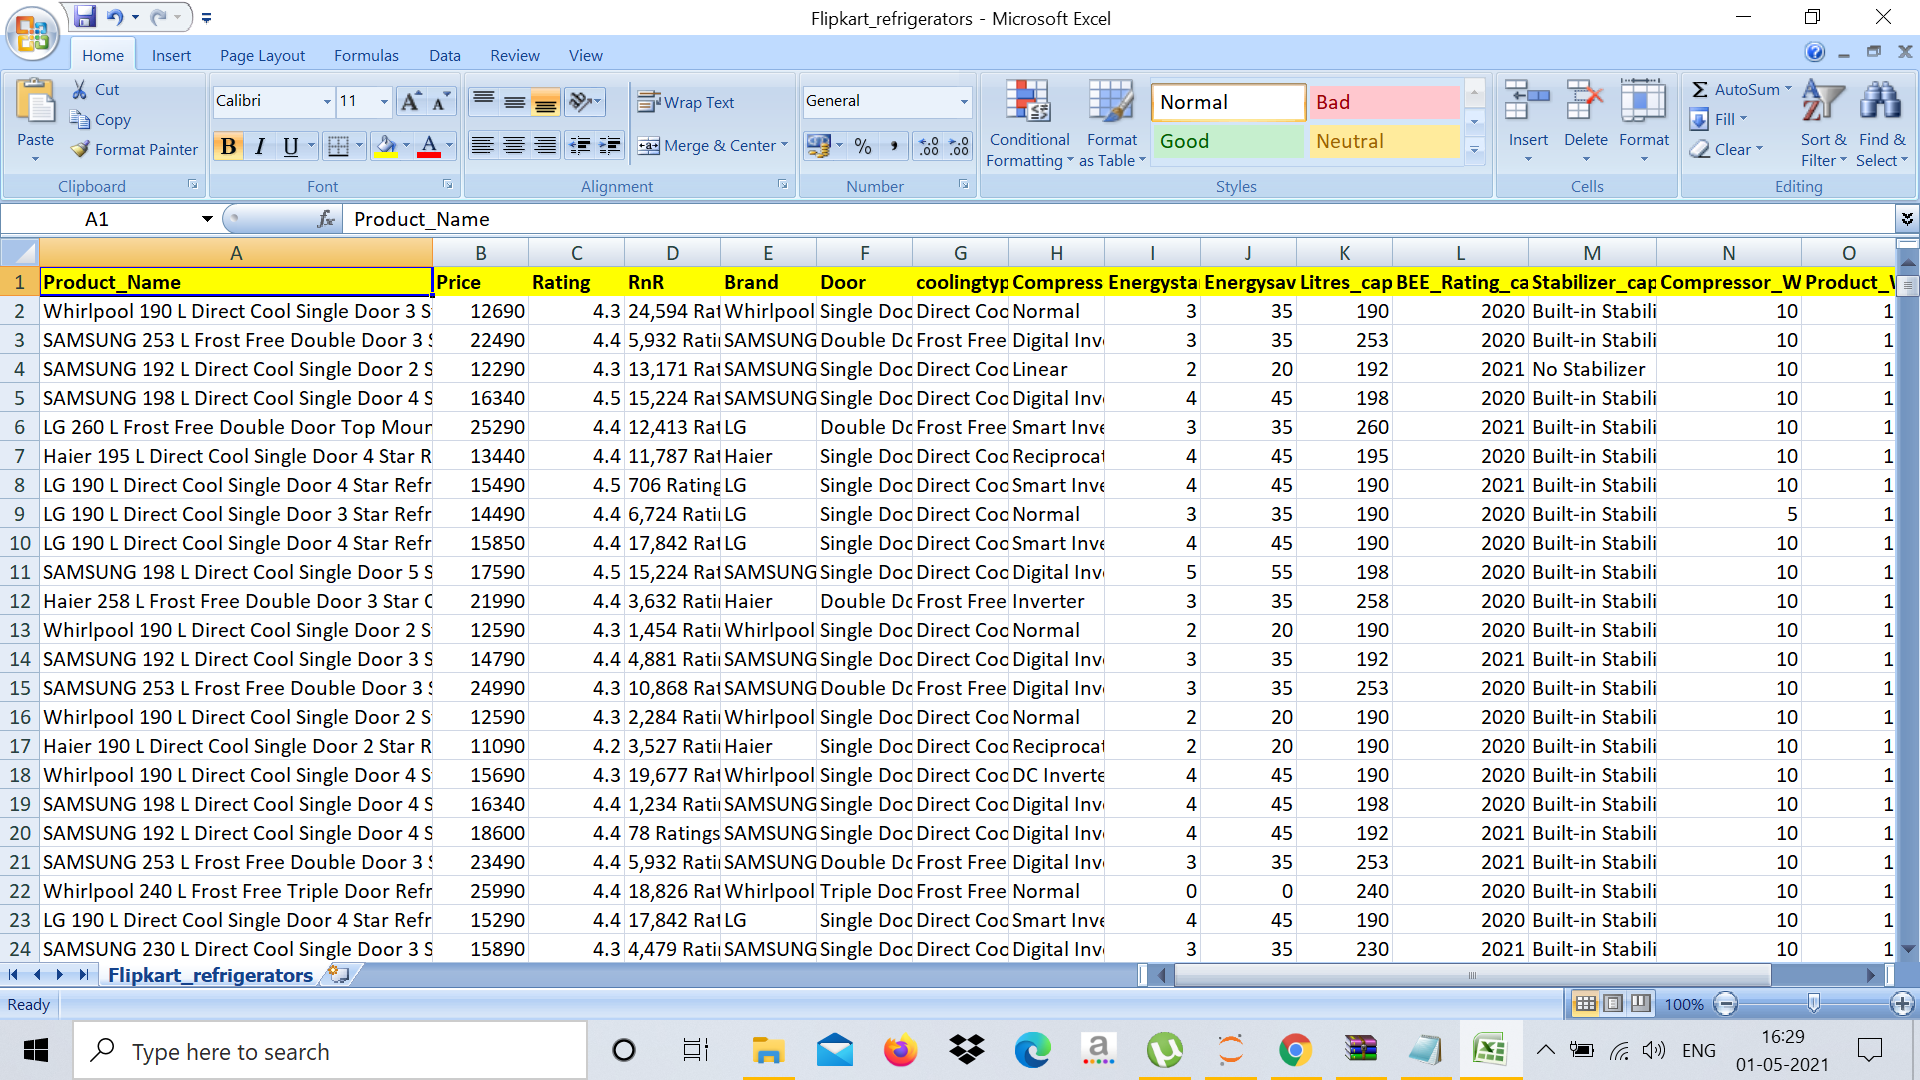

In [95]:
Final_df.Brand.value_counts()

Whirlpool    198
SAMSUNG      174
LG           125
Haier         88
Godrej        55
Panasonic     13
MarQ           8
BOSCH          8
Hisense        8
Hitachi        7
Lifelong       6
TOSHIBA        5
MOTOROLA       4
Sansui         4
Midea          3
Galanz         3
Onida          3
Croma          2
CANDY          2
Voltas         2
MITASHI        1
Motorola       1
Name: Brand, dtype: int64

In [103]:
Final_df.shape

(720, 15)